# Multi-Lender Symmetric Funnel Decomposition Analysis

This notebook demonstrates **multi-lender symmetric decomposition** showing:
- Aggregate waterfall charts with lender-level breakdowns
- Side-by-side comparison: Overall vs By Lender
- Drilldown charts showing each effect split by lender

## Workflow
1. Load booking funnel data  
2. Calculate decomposition for each lender
3. Visualize with 2-panel waterfall grid
4. Compare lender contributions

In [1]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Add src to path
sys.path.insert(0, str(Path.cwd().parent / 'src'))

import symmetric_decomposition_calculator
import visualization_engine

# Configure matplotlib for inline display
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 8)
plt.rcParams['figure.dpi'] = 100

## 1. Load Data

Using the standard mock_v2 dataset with ACA lender:

In [2]:
# Load data
data_path = Path.cwd().parent / 'data' / 'funnel_data_mock_v2.csv'
df = pd.read_csv(data_path)
df['month_begin_date'] = pd.to_datetime(df['month_begin_date'])

print(f"Loaded {len(df)} rows of data")
print(f"\nLenders: {', '.join(sorted(df['lender'].unique()))}")
print(f"Date range: {df['month_begin_date'].min().date()} to {df['month_begin_date'].max().date()}")
print(f"Unique months: {df['month_begin_date'].nunique()}")

Loaded 1728 rows of data

Lenders: ACA, ALY, CAP
Date range: 2023-01-01 to 2024-12-01
Unique months: 24


## 2. Calculate Multi-Lender Symmetric Decomposition

Comparing **June 2023 → June 2024** (Year-over-Year):

In [3]:
# Calculate multi-lender decomposition
results = symmetric_decomposition_calculator.calculate_multi_lender_decomposition(
    df=df,
    date_a='2023-06-01',
    date_b='2024-06-01'
)

print("Multi-Lender Symmetric Decomposition Results:")
print(f"  Method: {results.metadata['method']}")
print(f"  Period 1: {results.metadata['date_a']}")
print(f"  Period 2: {results.metadata['date_b']}")
print(f"  Lenders analyzed: {', '.join(results.metadata['lenders'])}")
print(f"\nAggregate Results (All Lenders):")
print(f"  Period 1 bookings: {results.metadata['aggregate_period_1_bookings']:,.0f}")
print(f"  Period 2 bookings: {results.metadata['aggregate_period_2_bookings']:,.0f}")
print(f"  Delta bookings: {results.metadata['aggregate_delta_bookings']:+,.0f}")

Calculating decomposition for ACA...
Calculating decomposition for ALY...
Calculating decomposition for CAP...
Multi-Lender Symmetric Decomposition Results:
  Method: symmetric_multi_lender
  Period 1: 2023-06-01
  Period 2: 2024-06-01
  Lenders analyzed: ACA, ALY, CAP

Aggregate Results (All Lenders):
  Period 1 bookings: 9,736
  Period 2 bookings: 9,885
  Delta bookings: +149


## 3. View Aggregate Summary

In [4]:
results.aggregate_summary

,effect_type,booking_impact
0,volume_effect,1286.552682
1,mix_effect,0.000000
2,str_approval_effect,44.984303
3,cond_approval_effect,94.998891
4,str_booking_effect,-1028.905037
5,cond_booking_effect,-247.678116
6,interaction_effect,-0.952723
7,total_change,149.000000


## 4. Create Lender Waterfall Grid

**2-Panel Visualization:**
- **Left Panel**: Overall aggregate waterfall (no lender distinction)
- **Right Panel**: Lender breakdown waterfall (stacked bars by lender)

This allows direct comparison between the overall view and the lender-attributed view.

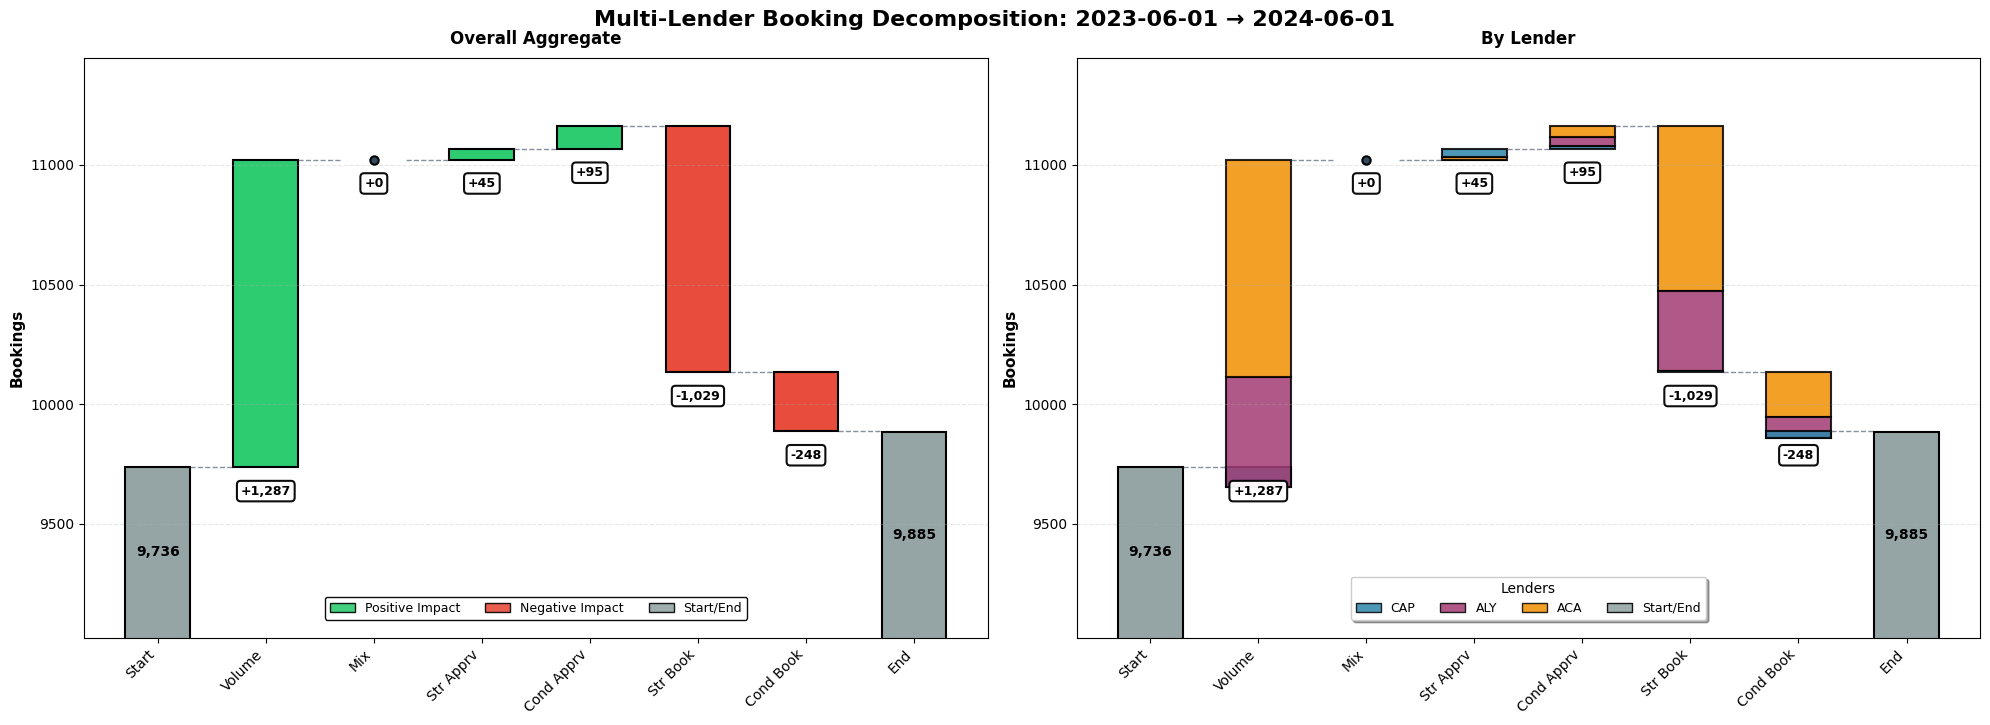

In [5]:
# Create lender waterfall grid
fig = visualization_engine.create_lender_waterfall_grid(
    lender_summaries=results.lender_summaries,
    aggregate_summary=results.aggregate_summary,
    metadata=results.metadata
)

plt.show()

## 5. Print Lender Breakdowns (Tabular View)

In [6]:
visualization_engine.print_lender_breakdowns(results.lender_summaries)

LENDER-LEVEL BREAKDOWN

lender             ACA         ALY        CAP        TOTAL
Cond Apprv   47.285843   36.483411  11.229636    94.998891
Cond Book  -186.435663  -88.222376  26.979923  -247.678116
Mix           0.000000    0.000000   0.000000     0.000000
Str Apprv    12.324957   -3.622235  36.281581    44.984303
Str Book   -688.945317 -336.614376  -3.345344 -1028.905037
Volume      911.342282  458.341013 -83.130613  1286.552682


TOTAL CHANGE BY LENDER:
----------------------------------------
  ACA: +95
  ALY: +66
  CAP: -12

  GRAND TOTAL: +149


## 6. Create Lender Drilldown Charts

Shows **each effect broken down by lender** in horizontal bar format:

/home/granty1231/funnel_decomposition/src/visualization_engine.py:1151: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(-x_max, x_max)


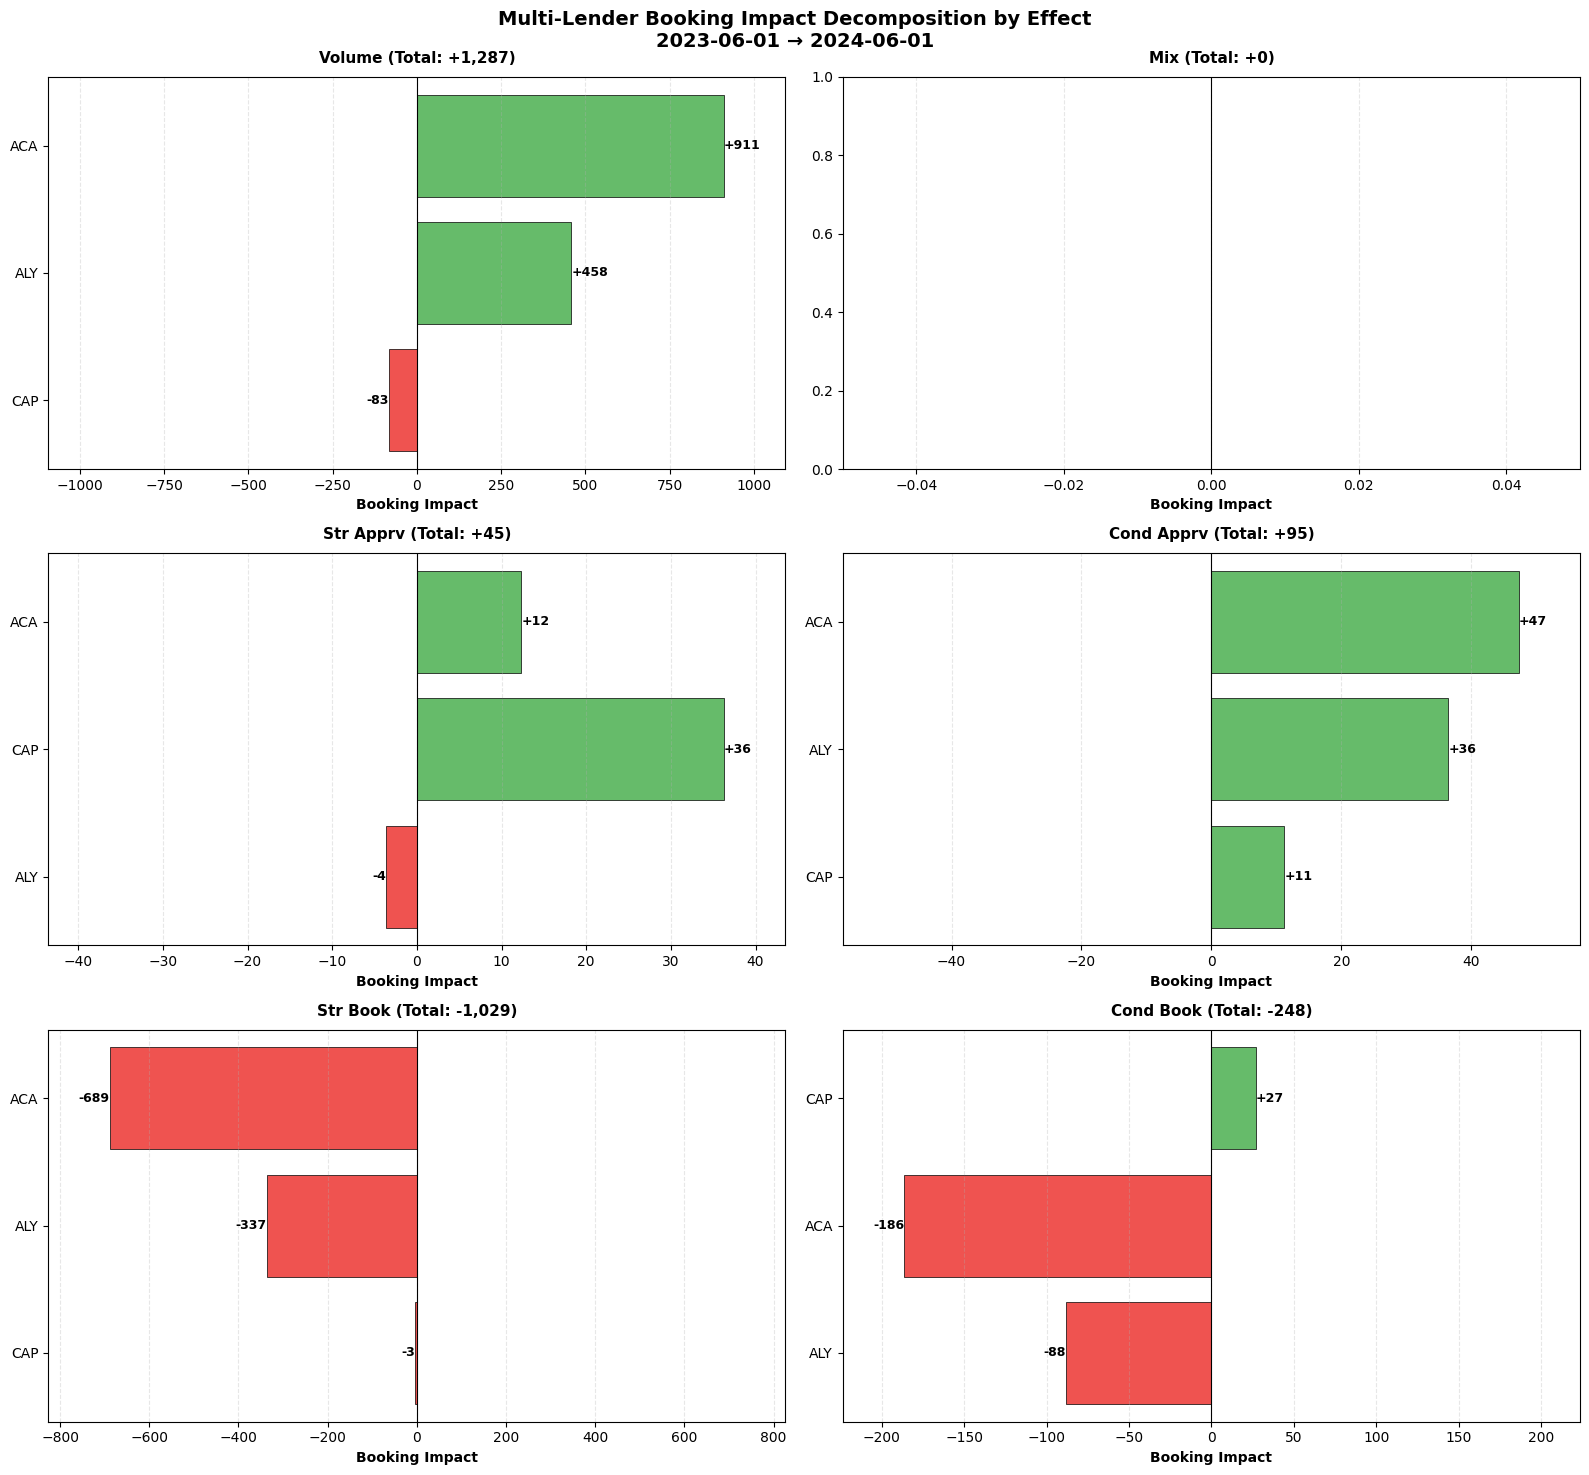

In [7]:
# Create lender drilldown
fig = visualization_engine.create_lender_drilldown(
    lender_summaries=results.lender_summaries,
    date_a=results.metadata['date_a'],
    date_b=results.metadata['date_b']
)

plt.show()

## Summary

This multi-lender analysis provides:

### Key Features:
1. **2-Panel Grid**: Compare overall vs lender-attributed views side-by-side
2. **Lender Attribution**: See which lender drives each effect
3. **Consistent Formatting**: Matches the style of single-lender waterfalls
4. **Flexible**: Works with any number of lenders in the dataset

### Use Cases:
- **Portfolio Management**: Understand overall lender network performance
- **Lender Comparison**: Identify top and bottom performers
- **Strategic Planning**: Allocate resources based on lender contributions
- **Root Cause Analysis**: Determine if issues are lender-specific or systematic